In [22]:
import os, sys

sys.path.append(os.path.join(os.getcwd(), '../src/'))
from data_reader.data_reader import DataReader

In [23]:
dr = DataReader()
shot_df = dr.read_shots("shots-20201201010000-data", start_shot_number=1, end_shot_number=4)
shot_df.head()

,timestamp,sequential_number,sequential_number_by_shot,displacement,load01,load02,load03,load04,shot_number,tags
0,1.606752e+09,0,0,49.171,0.568421,0.526316,0.597368,0.502632,1,"[異常A, 異常B]"
1,1.606752e+09,1,1,49.245,0.550000,0.526316,0.623684,0.507895,1,"[異常A, 異常B]"
2,1.606752e+09,2,2,49.136,0.568421,0.510526,0.660526,0.521053,1,"[異常A, 異常B]"
3,1.606752e+09,3,3,49.184,0.600000,0.502632,0.678947,0.521053,1,"[異常A, 異常B]"
4,1.606752e+09,4,4,49.149,0.578947,0.473684,0.671053,0.521053,1,"[異常A, 異常B]"


In [24]:
shots_meta_df = dr.read_shots_meta("shots-20201201010000-meta")
shots_meta_df.head()

,shot_number,spm,num_of_samples_in_cut_out
0,1,80.598572,3125.0
1,2,80.613753,3113.0
2,3,80.594235,3129.0
3,4,80.636509,3097.0
4,5,80.582338,3140.0


In [75]:
sys.path.append(os.path.join(os.getcwd(), "../src/analyze"))
from analyze.h_one_extract_features import *

# from analyze.analyze import *
# analyze.main(target="20201201010000")

In [26]:
shot_df

,timestamp,sequential_number,sequential_number_by_shot,displacement,load01,load02,load03,load04,shot_number,tags
0,1.606752e+09,0,0,49.171,0.568421,0.526316,0.597368,0.502632,1,"[異常A, 異常B]"
1,1.606752e+09,1,1,49.245,0.550000,0.526316,0.623684,0.507895,1,"[異常A, 異常B]"
2,1.606752e+09,2,2,49.136,0.568421,0.510526,0.660526,0.521053,1,"[異常A, 異常B]"
3,1.606752e+09,3,3,49.184,0.600000,0.502632,0.678947,0.521053,1,"[異常A, 異常B]"
4,1.606752e+09,4,4,49.149,0.578947,0.473684,0.671053,0.521053,1,"[異常A, 異常B]"
...,...,...,...,...,...,...,...,...,...,...
9362,1.606752e+09,9362,3124,34.116,1.723684,1.305263,-0.984211,0.123684,3,"[異常A, 異常B]"
9363,1.606752e+09,9363,3125,34.068,1.757895,1.326316,-0.942105,0.150000,3,"[異常A, 異常B]"
9364,1.606752e+09,9364,3126,34.042,1.765789,1.321053,-0.889474,0.152632,3,"[異常A, 異常B]"
9365,1.606752e+09,9365,3127,34.033,1.776316,1.313158,-0.842105,0.178947,3,"[異常A, 異常B]"


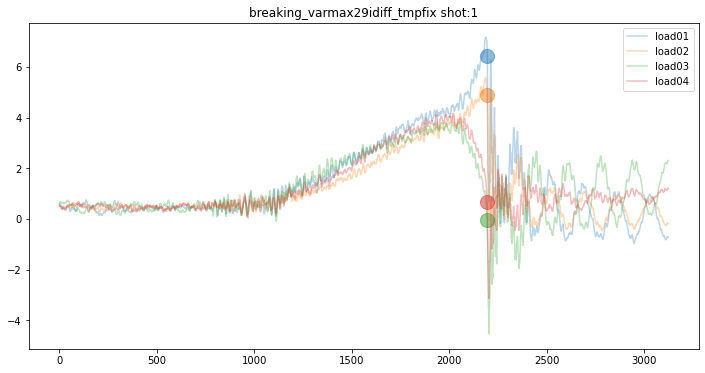

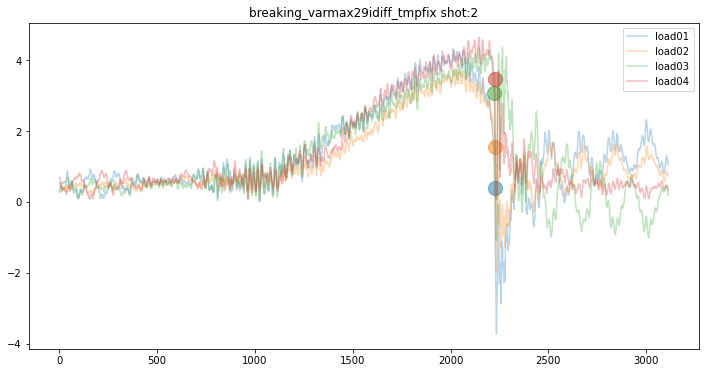

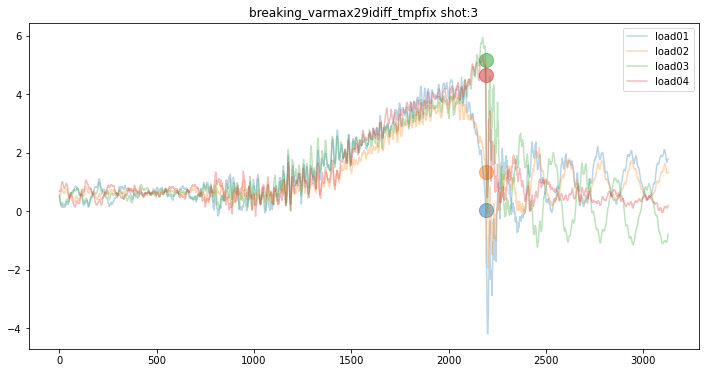

In [27]:
for shot in [1, 2, 3]:
    shot_data = shot_df[shot_df.shot_number == shot]
    shot_data = shot_data.reset_index()

    argmax,valmax = extract_features(shot_data, 80.0, breaking_varmax29idiff_tmpfix, shot=shot, disp_chart=True) 

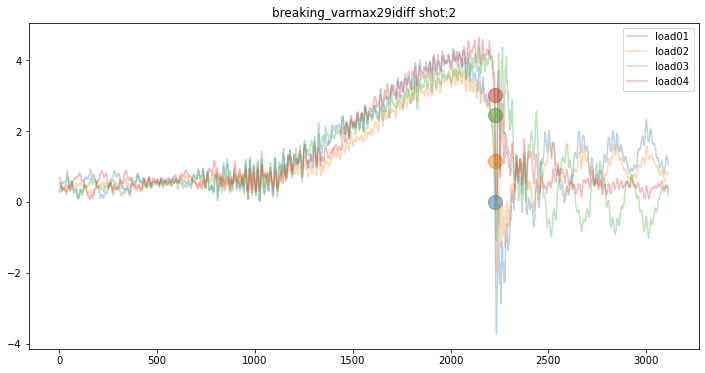

In [81]:
shot = 2
shot_data = shot_df[shot_df.shot_number == shot]
argmax,valmax = extract_features(shot_data.reset_index(), 80.0, breaking_varmax29idiff, shot=shot, disp_chart=True) 

/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/home/ymiyamoto5/anaconda3/l

(2002.0, 2502.0)

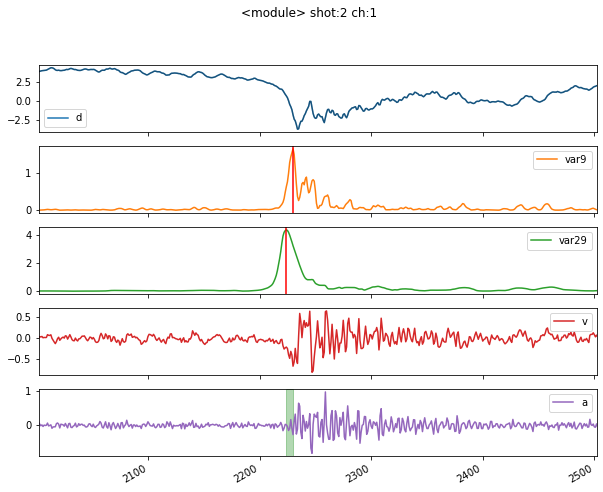

In [37]:
r_window=1; debug_xlim=[2000,2500]
d = shot_data.reset_index()['load01']; ch='1'

df = pd.DataFrame({'o':d})
df['d'] = df.o.rolling(r_window,center=True,min_periods=1).mean()   # 移動平均
df['v'] = df.d.diff().rolling(r_window,center=True,min_periods=1).mean()        # 速度
df['a'] = df.v.diff().rolling(r_window,center=True,min_periods=1).mean()        # 加速度

df['var9'] = df.o.rolling(9,center=True).var()
df['var29'] = df.o.rolling(29,center=True).var()
varmax9 = df.var9.argmax()
varmax29 = df.var29.argmax()
if varmax29 >= varmax9:                          # 502全ch破綻,rollingの範囲をspmに連動させるか?  346:3, 731:3
    h = varmax9                                  # varmax29とvarmax9が一致 or 逆転した場合はvarmax9>を採用、その範囲でmax採るより前倒した方が吉
else:
    h = df[varmax29:varmax9]['a'].argmin()        ####        601:ff2でvarmax29とvarmax9が一致,29を>広げるのは逆効果

ax = df[['d','var9','var29','v','a']].plot(figsize=(10,8),subplots=True,c='b',
                                   title='%s shot:%d ch:%s'%(sys._getframe().f_code.co_name,shot,ch))
df.o.plot(ax=ax[0],alpha=.3,c='black');
ax[0].axvline(h,c='r')
ax[1].axvline(varmax9,color='r')
ax[2].axvline(varmax29,color='r')
ax[4].axvspan(varmax29,varmax9,color='g',alpha=.3)
ax[4].axvline(h,color='r')
plt.xlim(h+debug_xlim[0],h+debug_xlim[1])



In [42]:
h = df[varmax29:varmax9]['a'].argmin()        ####        601:ff2でvarmax29とvarmax9が一致,29を>広げるのは逆効果


2

In [43]:
df[varmax29:varmax9]

,o,d,v,a,var9,var29
2224,0.639474,0.639474,-0.207895,0.018421,0.624110,4.389033
2225,0.397368,0.397368,-0.242105,-0.034211,0.753092,4.346890
2226,0.007895,0.007895,-0.389474,-0.147368,0.980533,4.209912
2227,-0.468421,-0.468421,-0.476316,-0.086842,1.264889,4.011691
2228,-0.778947,-0.778947,-0.310526,0.165789,1.415896,3.778251
2229,-1.176316,-1.176316,-0.397368,-0.086842,1.527539,3.523228


In [45]:
df.a[varmax29:varmax9].argmin()

2

In [57]:
df1 = pd.DataFrame(
    {'a': [1,7,2,5,4]}
)
df1

,a
0,1
1,7
2,2
3,5
4,4


In [58]:
df1[2:5]

,a
2,2
3,5
4,4


In [60]:
df1[2:5].a.argmax()

1

In [64]:
df1 = pd.DataFrame(
    {'a': [1,7,2,5,4]}
)
df1['i'] = range(len(df1))
df1 = df1.set_index('i')

In [65]:
df1

,a
i,
0,1
1,7
2,2
3,5
4,4


In [71]:
df1[2:5].a.idxmax()

3

In [68]:
!python --version

Python 3.6.9


In [70]:
!pip list | grep pandas

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
pandas (0.21.1)


In [80]:
def breaking_varmax29(d, spm, low=0, high=8000,r_window=1,Debug=False,shot=999,ch='loadxx',debug_xlim=[-100,100]):
    """ 破断点


    """
    df = pd.DataFrame({'o':d})
    df['d'] = df.o.rolling(r_window,center=True,min_periods=1).mean()   # 移動平均
    df['v'] = df.d.diff().rolling(r_window,center=True,min_periods=1).mean()        # 速度
    df['a'] = df.v.diff().rolling(r_window,center=True,min_periods=1).mean()        # 加速度

    df['var9'] = df.o.rolling(9,center=True).var()
    df['var29'] = df.o.rolling(29,center=True).var()
    varmax9 = df.var9.idxmax()
    varmax29 = df.var29.idxmax()
    if varmax29 >= varmax9:                          # 502全ch破綻,rollingの範囲をspmに連動させるか?  346:3, 731:3
        h = varmax9                                  # varmax29とvarmax9が一致 or 逆転した場合はvarmax9を採用、その範囲でmax採るより前倒した方が吉
    else:
        h = df[varmax29:varmax9]['a'].idxmin()        ####        601:ff2でvarmax29とvarmax9が一致,29を広げるのは逆効果

    if Debug is True:
        ax = df[['d','var9','var29','v','a']].plot(figsize=(10,8),subplots=True,c='b',
                                   title='%s shot:%d ch:%s'%(sys._getframe().f_code.co_name,shot,ch))
        df.o.plot(ax=ax[0],alpha=.3,c='black');
        ax[0].axvline(h,c='r')
        ax[1].axvline(varmax9,color='r')
        ax[2].axvline(varmax29,color='r')
        ax[4].axvspan(varmax29,varmax9,color='g',alpha=.3)
        ax[4].axvline(h,color='r')
        plt.xlim(h+debug_xlim[0],h+debug_xlim[1])

    # 破断点の場合は、df.d[h]ではなくdf.o[h]を返すべきか?
    return h, df.d[h]

def _idiff(x):
    # 必ずraw=Trueで呼ぶこと。
    # x は窓内の値が入った配列                                                                                                                                          # x[0]が最も古い、x[-1]が最も新しい値
    # 集計後の値を return する
    i_width = int(len(x)/2)
    return x[-i_width:].mean() - x[:i_width].mean()

def breaking_varmax29idiff(d, spm, fs=100000,low=0, high=8000, r_window=19,Debug=False,shot=9999,ch='loadxx',debug_xlim=[-100,100]):
    """ 破断点
    :d (np.array)        荷重系列データ
    :spm (float)         SPM(shots per minutes)、荷重開始→最大→破断の推移の速度にほぼ反比例すると考えられる。今のところ未使用。
    :fs (int)            サンプリング周波数(Hz)
    :low (int)           バンドパスフィルタ下限周波数
    :high (float)        バンドパスフィルタ上限周波数
    :r_window (int)      移動平均ウィンドウ範囲
    :Debug (bool)        グラフ表示
    :return (int,float)  最大荷重点index, 最大荷重値

    ToDo: 低SPMではバンドパスノイズの影響が前方に及んでるケースがある。
          低SPM時はノイズ除去の必要性が大きくないはずなので調整の余地あり。
    """
    df = pd.DataFrame({'o':d})
    s,f,p = fft_spectrum(df.o,fs=fs)                      # FFT
    df['d'] = bandpass_ifft(s,f,low,high).real            # バンドパス
    df['v'] = df.o.diff()                                 # 速度
    df['a'] = df.v.diff()                                 # 加速度
    df['v9'] =  (df.d.rolling(9,center=True).var() * -df.d.rolling(9,center=True).apply(_idiff))
    df['v29'] = (df.d.rolling(29,center=True).var() * -df.d.rolling(29,center=True).apply(_idiff))
    varmax9idiff =  df.v9.idxmax()
    varmax29idiff = df.v29.idxmax()
    if varmax29idiff >= varmax9idiff:                     # varmaxにidiffをかけることで下降局面に絞る; 731:1
        h = varmax9idiff                                  #
    else:                                                 #
        h = df[varmax29idiff:varmax9idiff]['a'].idxmin()  #

    if Debug is True:
        ax = df[['d','v','v29','v9','a']].plot(figsize=(10,8),subplots=True,c='b',
                title='%s shot:%d,ch=%s'%(sys._getframe().f_code.co_name,shot,ch))
        df.o.plot(ax=ax[0],alpha=.3,c='black');
        ax[0].axvline(h,c='r'); #ax[2].axhline(criteria,c='g')
        ax[2].axvline(varmax29idiff,c='r'); #ax[2].axhline(criteria,c='g')
        ax[3].axvline(varmax9idiff,c='r'); #ax[2].axhline(criteria,c='g')
        ax[4].axvspan(varmax29idiff,varmax9idiff,color='g',alpha=.3)
        ax[4].axvline(h,c='r'); #ax[2].axhline(criteria,c='g')
        plt.xlim(h+debug_xlim[0],h+debug_xlim[1])

    # 値として元波形 or ノイズ除去後のいずれを採用すべきかは個々に判断されるべきと考えるので、
    # indexと併せて(ノイズ除去後の)値も返す仕様とする。
    return h, df.o[h]
